In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
data = np.loadtxt("/Users/weilu/Research/server/mar_2018/05_week/unfold_strengthen_h1_h2/force_2_mem_1.0_/simulation/0/rnative.dat")

In [3]:
data

array([[  0.      ,   3.806121,   7.074538, ...,  26.010404,  29.297561,
         27.977447],
       [  3.806121,   0.      ,   3.805936, ...,  26.304308,  29.587635,
         28.318099],
       [  7.074538,   3.805936,   0.      , ...,  24.338368,  27.567935,
         26.395188],
       ..., 
       [ 26.010404,  26.304308,  24.338368, ...,   0.      ,   3.799961,
          5.562379],
       [ 29.297561,  29.587635,  27.567935, ...,   3.799961,   0.      ,
          3.788385],
       [ 27.977447,  28.318099,  26.395188, ...,   5.562379,   3.788385,
          0.      ]])

## 91 to 115, as helix 1

In [4]:
cutoff = 7
n = data.shape[0]
MAX_OFFSET = 6
remove_band = np.eye(n)
for i in range(1, MAX_OFFSET):
    remove_band += np.eye(n, k=i)
    remove_band += np.eye(n, k=-i)
data[remove_band==1] = np.max(data)

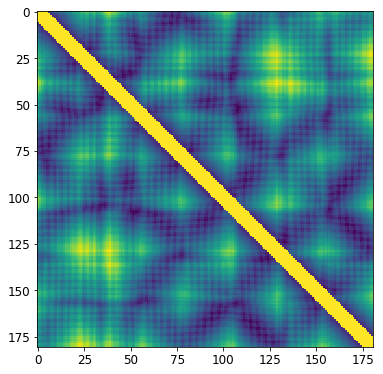

In [5]:
plt.imshow(data)

In [7]:
data[data > 10] = 0

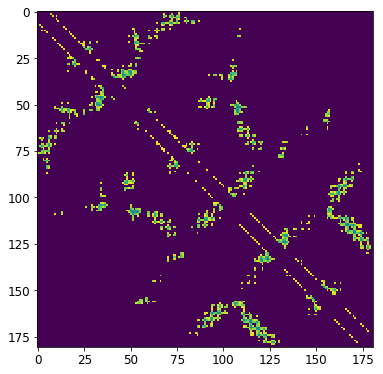

In [9]:
plt.imshow(data)

In [14]:
a = (data < 7)[25:57]

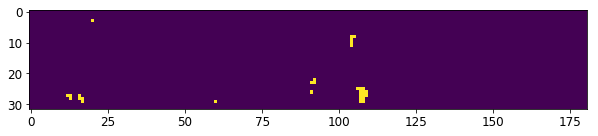

In [15]:
a[:,25:57] = 0
plt.imshow(a)

In [16]:
a.sum()

31

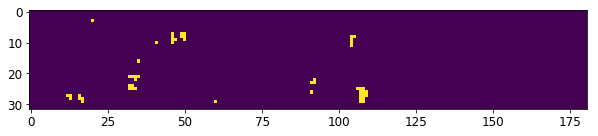

In [17]:
plt.imshow((data < cutoff)[25:57])

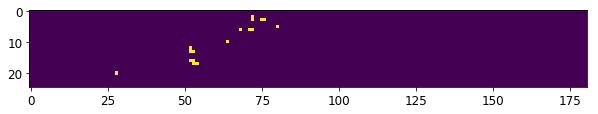

In [18]:
plt.imshow((data < cutoff)[:25])

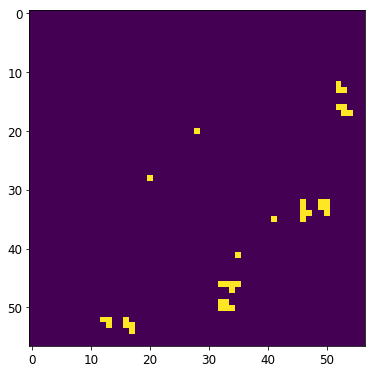

In [19]:
plt.imshow((data < cutoff)[:57,:57])

In [56]:
(data < cutoff)[:25].sum()

17

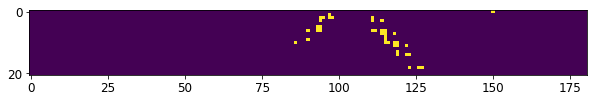

In [57]:
plt.imshow((data < cutoff)[160:])

In [58]:
(data < cutoff)[160:].sum()

40

In [67]:
data = pd.read_table("/Users/weilu/opt/gremlin/protein/2xov/raptor.2xov.dat", skiprows=9, sep="\s+", names=["i","j","s", "ss","p"]).dropna()

In [65]:
181*181

32761

In [75]:
data["i"] = data["i"].astype(int)
data["j"] = data["j"].astype(int)

In [96]:
# data.sort_values(by=["i","j"])

In [92]:
181*181/2

16380.5

In [78]:
data.sort_values(by=["i","j"]).values[0]

array([ 1.      ,  7.      ,  0.      ,  8.      ,  0.037144])

In [93]:
t = np.zeros((181,181))
for index, d in data.iterrows():
#     print(index)
    i = int(d["i"]) - 1
    j = int(d["j"]) - 1 
    p = d["p"]
#     print(i,j,p)
    t[i,j] = p
    t[j,i] = p

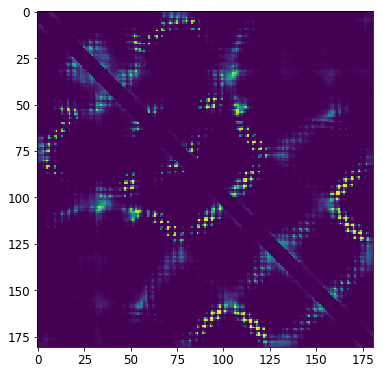

In [95]:
plt.imshow(t)

In [103]:
data = t
n = data.shape[0]
MAX_OFFSET = 6
remove_band = np.eye(n)
for i in range(1, MAX_OFFSET):
    remove_band += np.eye(n, k=i)
    remove_band += np.eye(n, k=-i)
data[remove_band==1] = np.min(data)

In [104]:
cutoff = 0.5
(data > cutoff)[:25].sum()

45

In [105]:
(data > cutoff)[160:].sum()

79